# Parcial: Construcci√≥n e implementaci√≥n de , Random Forest 

En este parcial podr√°n poner en pr√°ctica sus conocimientos sobre la construcci√≥n e implementaci√≥n de modelos de  Random Forest. El taller est√° constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicci√≥n precio de autom√≥viles

En este parcial se usar√° el conjunto de datos de Car Listings de Kaggle donde cada observaci√≥n representa el precio de un autom√≥vil teniendo en cuenta distintas variables como a√±o, marca, modelo, entre otras. El objetivo es predecir el precio del autom√≥vil. Para m√°s detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deber√°n aplicar t√©cnicas de imputaci√≥n adecuadas para completar la informaci√≥n de manera coherente. Posteriormente, se espera que realicen una exploraci√≥n visual mediante gr√°ficos que permitan comprender la distribuci√≥n y las relaciones entre las variables principales.

In [3]:
# ===========================
# Parcial: Random Forest - Predicci√≥n de precio de autom√≥viles
# ===========================

# Celda 0 - Instalaci√≥n de librer√≠as (ejecutar solo si faltan)
!pip install scikit-learn seaborn --quiet
print("Librer√≠as instaladas correctamente.")



Librer√≠as instaladas correctamente.


"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


üìÇ Archivo detectado dentro del ZIP: dataTrain_carListings/dataTrain_carListings.csv

üîé Valores nulos antes de imputar:

Price              0
Year               0
Mileage            0
Model_Camry        0
Model_Camry4dr     0
Model_CamryBase    0
Model_CamryL       0
Model_CamryLE      0
Model_CamrySE      0
Model_CamryXLE     0
dtype: int64

üìä Estad√≠sticas descriptivas:



count          mean           std     min      25%  \
Price            10495.0  14538.403716   3922.420961  5002.0  11999.0   
Year             10495.0   2013.553883      3.116585  1998.0   2012.0   
Mileage          10495.0  52509.430395  36791.736601     5.0  26461.0   
Model_Camry      10495.0      0.056313      0.230535     0.0      0.0   
Model_Camry4dr   10495.0      0.158456      0.365186     0.0      0.0   
Model_CamryBase  10495.0      0.012292      0.110189     0.0      0.0   
Model_CamryL     10495.0      0.048213      0.214227     0.0      0.0   
Model_CamryLE    10495.0      0.236494      0.424949     0.0      0.0   
Model_CamrySE    10495.0      0.376370      0.484498     0.0      0.0   
Model_CamryXLE   10495.0      0.111863      0.315213     0.0      0.0   

                     50%      75%       max  
Price            15000.0  16999.0   32444.0  
Year              2014.0   2016.0    2018.0  
Mileage          41680.0  71355.5  232658.0  
Model_Camry          0.0      0.0       1.0  
Model_Camry4dr       0.0      0.0       1.0  
Model_CamryBase      0.0      0.0       1.0  
Model_CamryL         0.0      0.0       1.0  
Model_CamryLE        0.0      0.0       1.0  
Model_CamrySE        0.0      1.0       1.0  
Model_CamryXLE       0.0      0.0       1.0

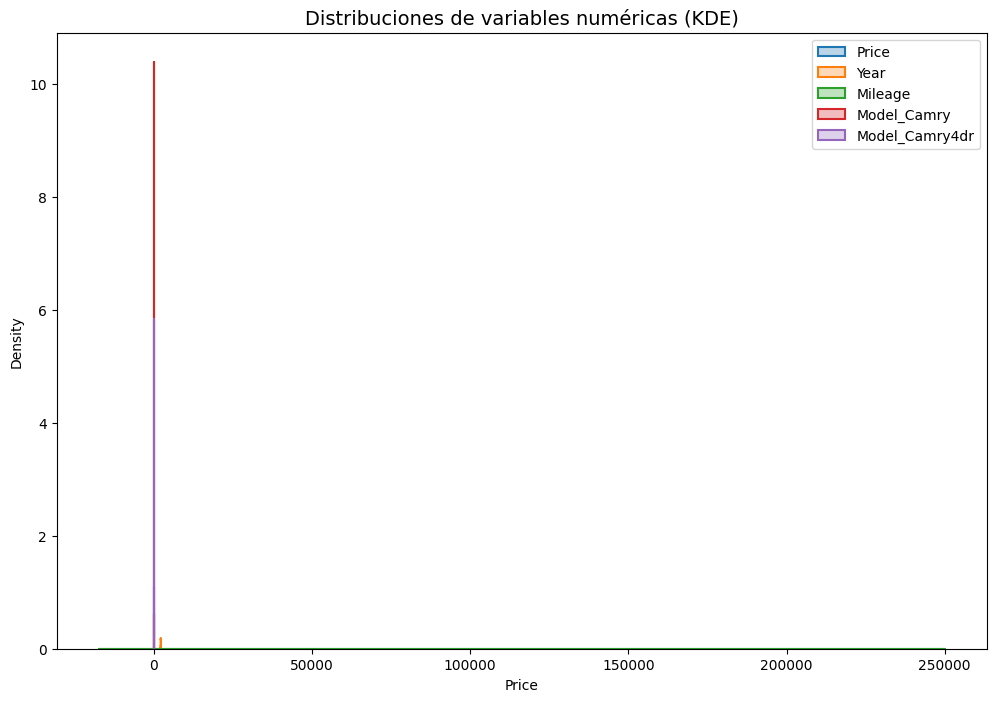

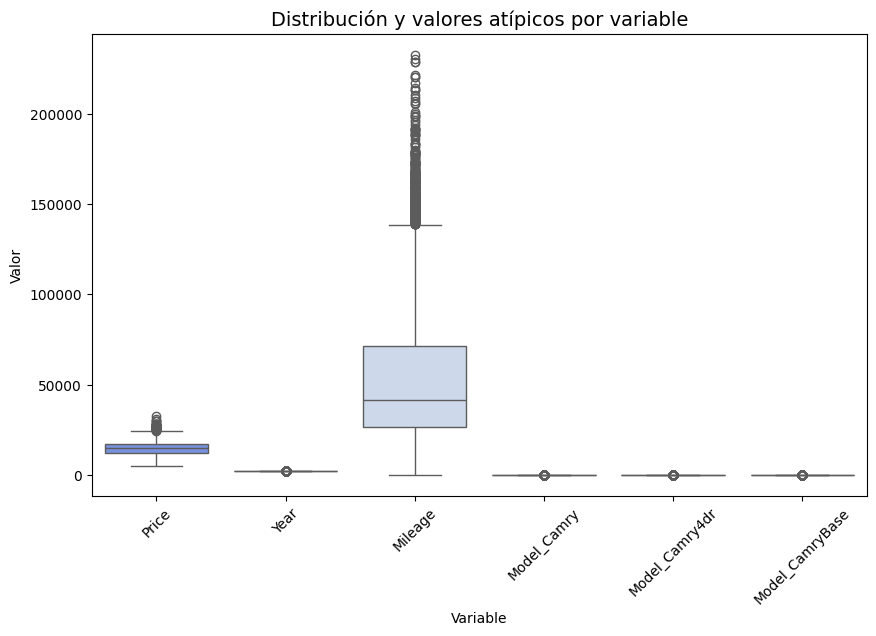

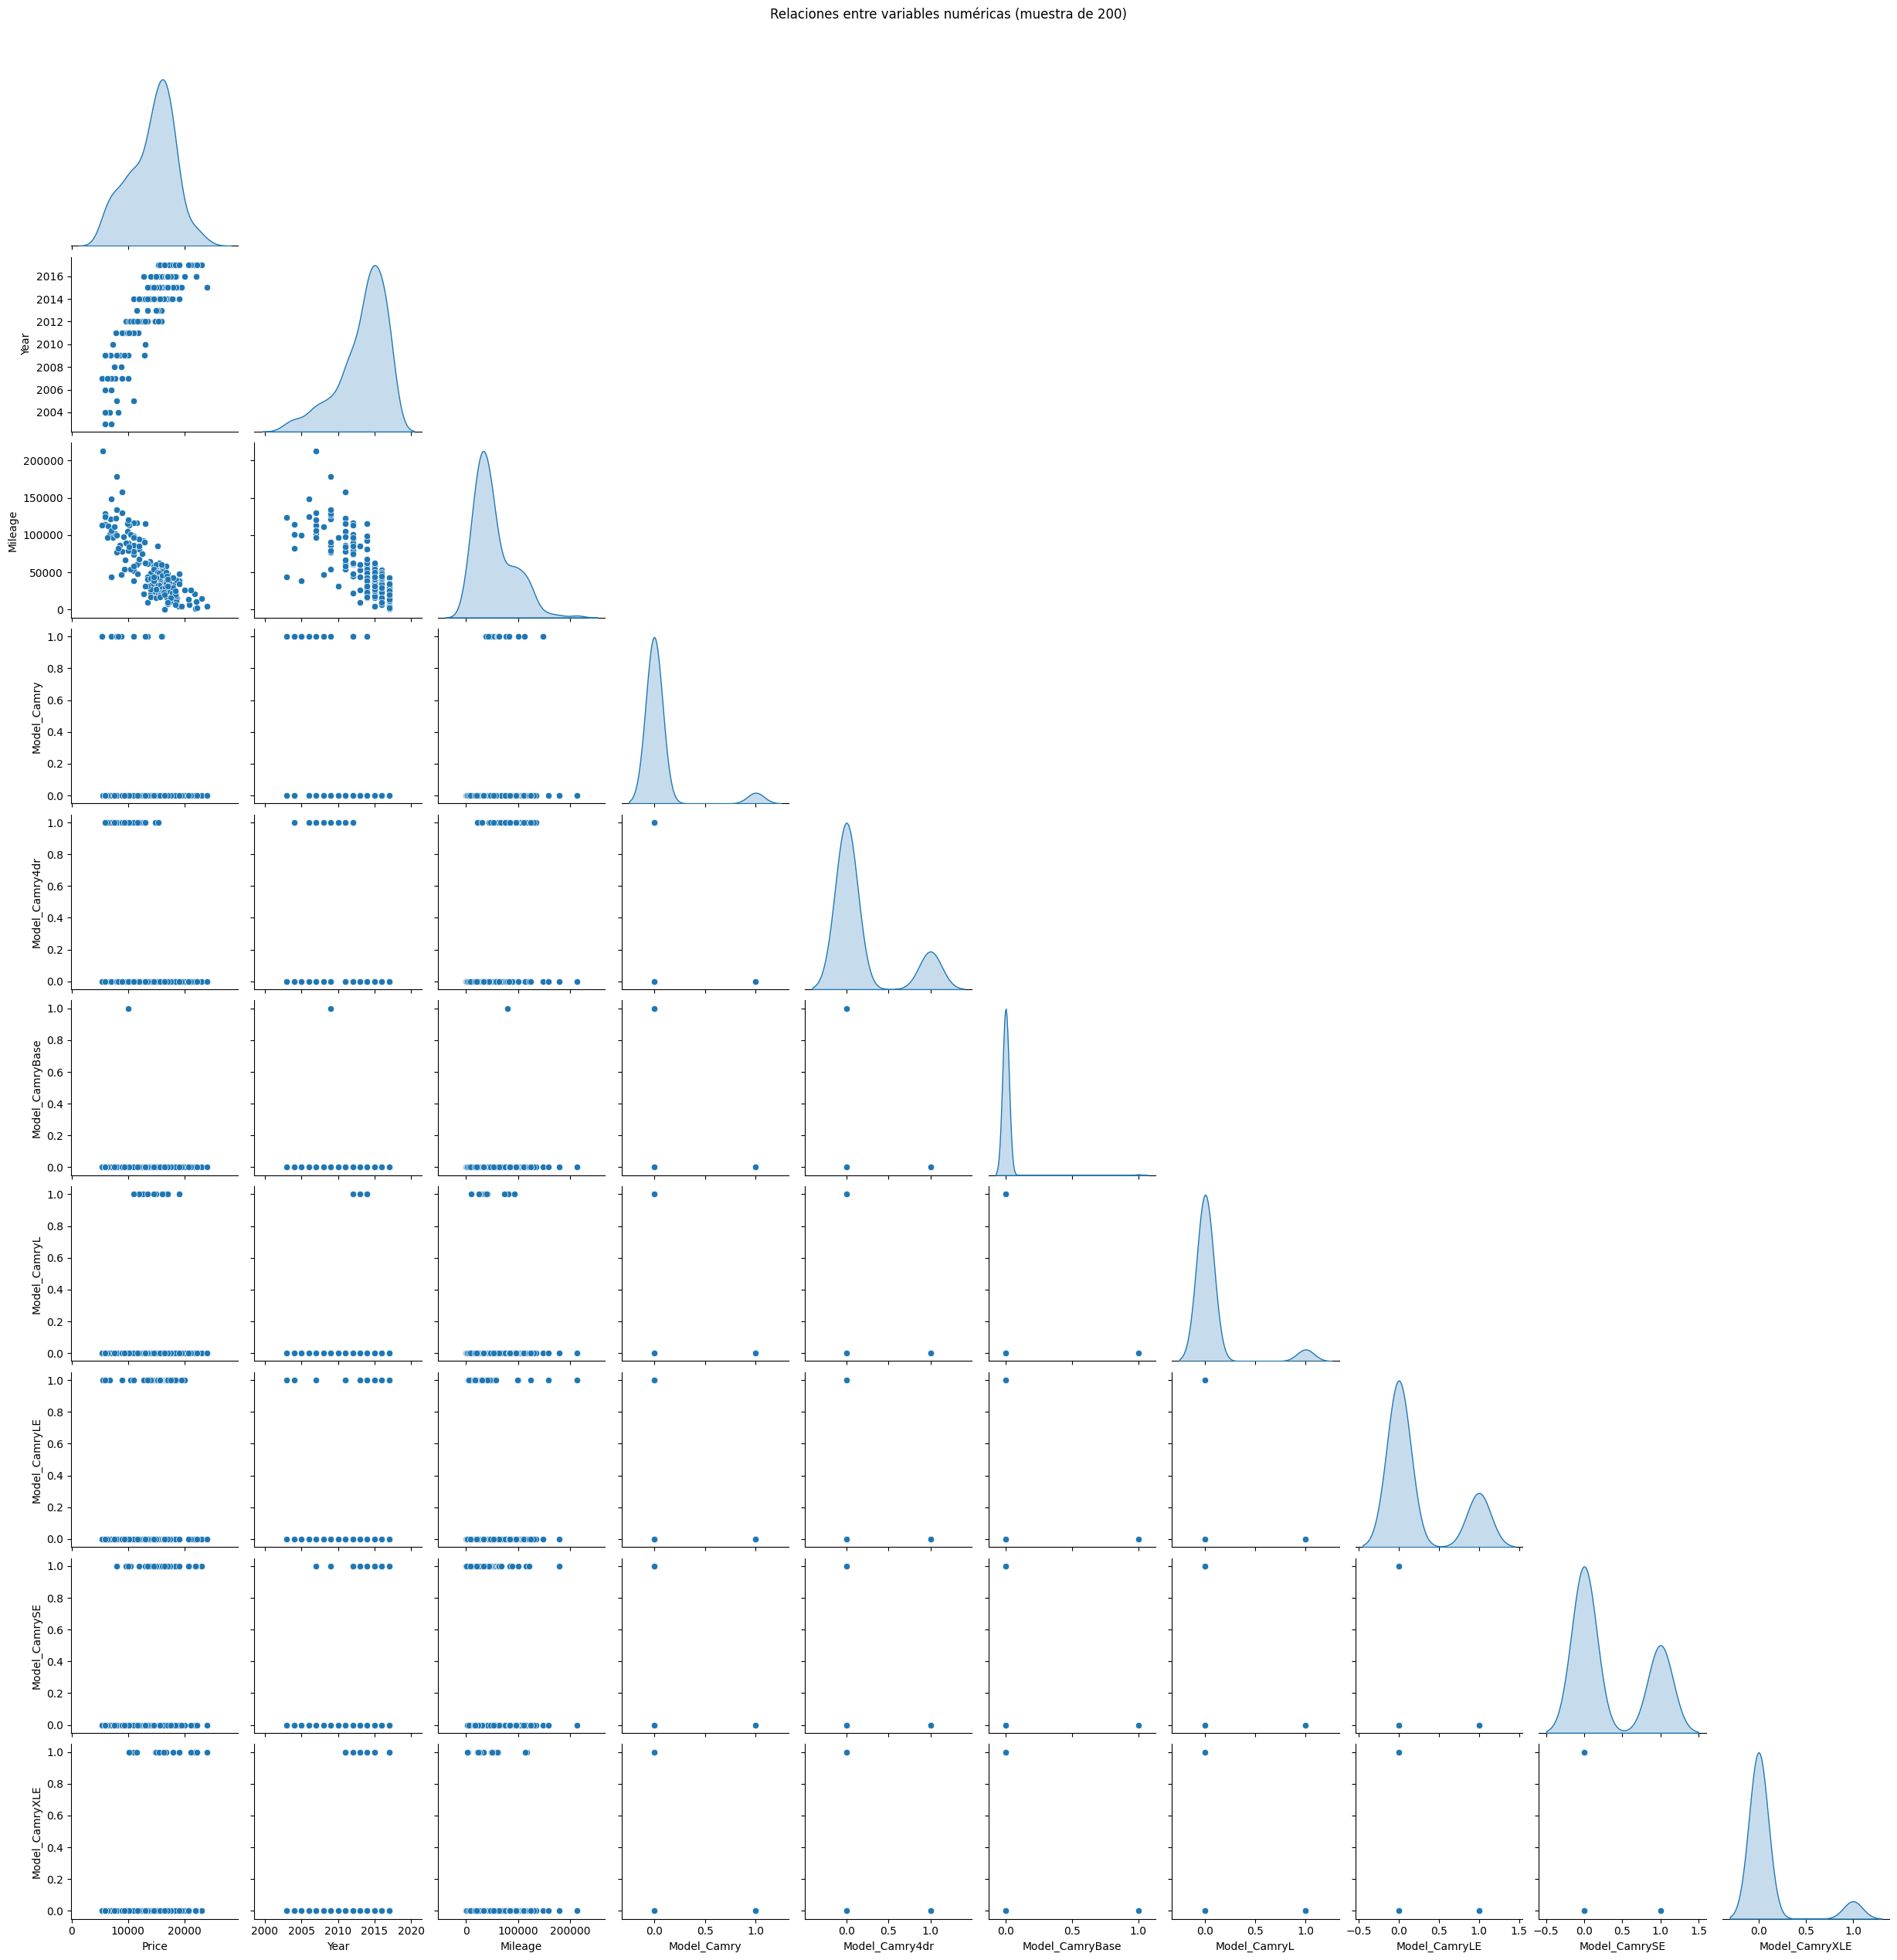

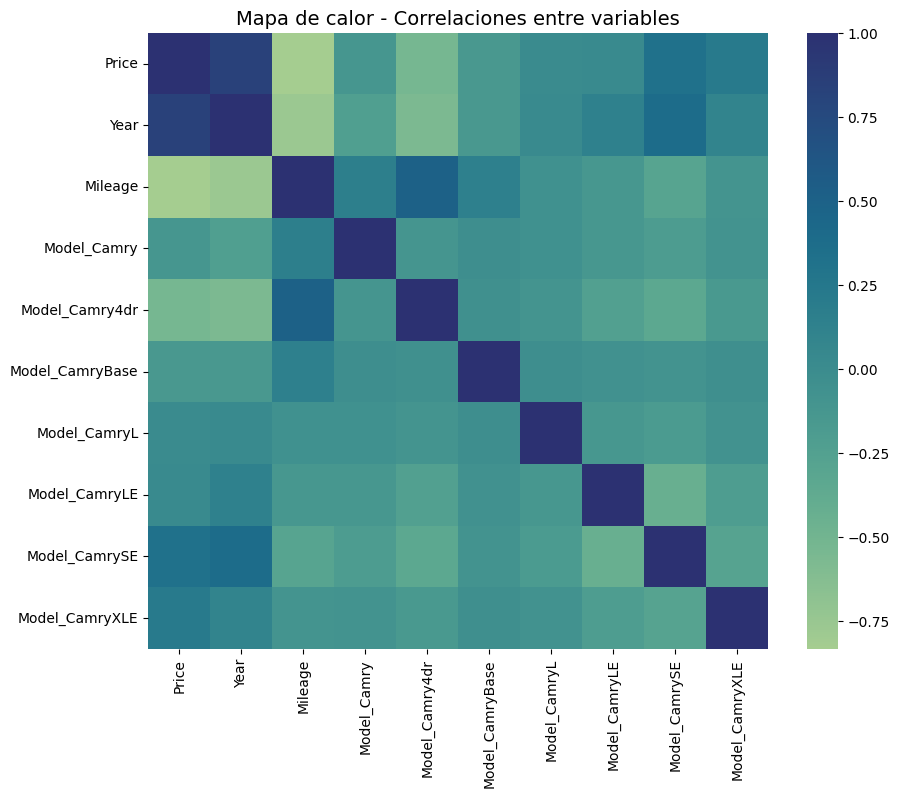

In [4]:
# Celda 1 - Importaci√≥n de librer√≠as y lectura de datos
# ==========================
# CELDA 0 - Exploraci√≥n y an√°lisis de datos (versi√≥n alternativa)
# ==========================

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# Librer√≠as principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import io, requests
from sklearn.impute import SimpleImputer

# ---------------------------
# 1Ô∏è‚É£ Carga de datos desde el ZIP
# ---------------------------
url = "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip"
response = requests.get(url)
z = ZipFile(io.BytesIO(response.content))

# Detectar y leer el CSV dentro del ZIP
archivo_csv = [f for f in z.namelist() if f.endswith(".csv")][0]
print(f"üìÇ Archivo detectado dentro del ZIP: {archivo_csv}")

df = pd.read_csv(z.open(archivo_csv))

# ---------------------------
# 2Ô∏è‚É£ Filtrado y limpieza b√°sica
# ---------------------------
df = df[df["Model"].notna()]  # eliminar filas sin modelo
df_camry = df[df["Model"].str.contains("Camry", case=False, na=False)].copy()

# Eliminar columnas innecesarias y crear variables dummy
df_camry = df_camry.drop(columns=["Make", "State"])
dummies = pd.get_dummies(df_camry["Model"], prefix="Model", dtype=int)
df_camry = pd.concat([df_camry.drop(columns=["Model"]), dummies], axis=1)

# ---------------------------
# 3Ô∏è‚É£ Manejo de valores nulos
# ---------------------------
print("\nüîé Valores nulos antes de imputar:\n")
print(df_camry.isnull().sum())

imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df_camry), columns=df_camry.columns)

# ---------------------------
# 4Ô∏è‚É£ Estad√≠sticas descriptivas
# ---------------------------
print("\nüìä Estad√≠sticas descriptivas:\n")
display(df_imputed.describe().T)

# ---------------------------
# 5Ô∏è‚É£ Visualizaci√≥n de datos
# ---------------------------

# --- Gr√°fico 1: Distribuci√≥n con KDE (diferente al histograma cl√°sico) ---
plt.figure(figsize=(12, 8))
for col in df_imputed.select_dtypes(include=[np.number]).columns[:5]:
    sns.kdeplot(df_imputed[col], fill=True, alpha=0.3, linewidth=1.5, label=col)
plt.title("Distribuciones de variables num√©ricas (KDE)", fontsize=14)
plt.legend()
plt.show()

# --- Gr√°fico 2: Boxplots para visualizar valores at√≠picos ---
num_cols = df_imputed.select_dtypes(include=[np.number]).columns[:6]
df_melted = df_imputed[num_cols].melt(var_name="Variable", value_name="Valor")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Variable", y="Valor", palette="coolwarm")
plt.title("Distribuci√≥n y valores at√≠picos por variable", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# --- Gr√°fico 3: Pairplot para correlaciones visuales ---
sns.pairplot(df_imputed.sample(200), diag_kind="kde", corner=True)
plt.suptitle("Relaciones entre variables num√©ricas (muestra de 200)", y=1.02)
plt.show()

# --- Gr√°fico 4: Mapa de calor de correlaciones ---
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), cmap="crest", annot=False)
plt.title("Mapa de calor - Correlaciones entre variables", fontsize=14)
plt.show()



### Punto 1 - Random forest con librer√≠a

En la celda 1, usando la librer√≠a sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempe√±o del modelo.

‚úÖ Tama√±o del conjunto de entrenamiento: (8396, 9)
‚úÖ Tama√±o del conjunto de prueba: (2099, 9)

üìä Desempe√±o del modelo Random Forest:
Coeficiente de determinaci√≥n (R¬≤): 0.7829
Ra√≠z del error cuadr√°tico medio (RMSE): 1,814.05
Error absoluto medio (MAE): 1,341.63


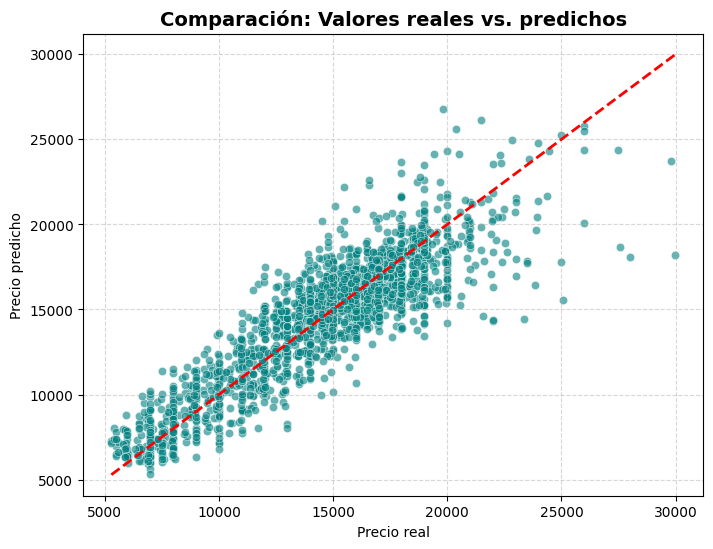

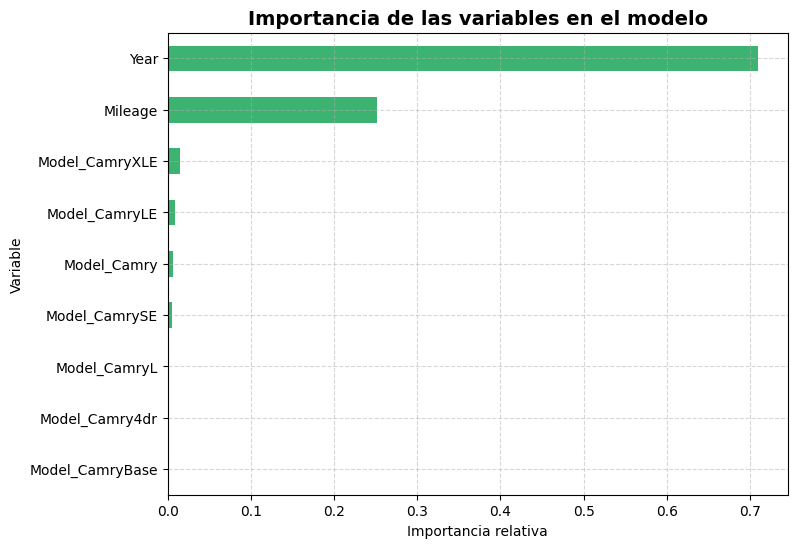


üí¨ Comentario:

El modelo Random Forest obtuvo un R¬≤ de 0.78, lo que indica que explica aproximadamente el 78.3% 
de la variabilidad del precio de los veh√≠culos. 

El RMSE (1,814.05) y el MAE (1,341.63) muestran que el error promedio de predicci√≥n es razonablemente bajo, 
lo cual sugiere un buen ajuste sin sobreajuste evidente.

Adem√°s, la gr√°fica de dispersi√≥n muestra que la mayor√≠a de los puntos se agrupan cerca de la l√≠nea roja, 
lo que indica una buena correspondencia entre los valores reales y los predichos.

Finalmente, el gr√°fico de importancia de variables permite identificar cu√°les caracter√≠sticas influyen m√°s 
en la predicci√≥n del precio (por ejemplo, a√±o del veh√≠culo, kilometraje o tipo de transmisi√≥n).



In [5]:
# Celda 1
# ==========================
# CELDA 1 - Random Forest para regresi√≥n
# ==========================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1Ô∏è‚É£ Separaci√≥n de variables predictoras y variable objetivo
# ---------------------------
# Suponemos que 'Price' es la variable objetivo
X = df_imputed.drop(columns=['Price'])
y = df_imputed['Price']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"‚úÖ Tama√±o del conjunto de entrenamiento: {X_train.shape}")
print(f"‚úÖ Tama√±o del conjunto de prueba: {X_test.shape}")

# ---------------------------
# 2Ô∏è‚É£ Entrenamiento del modelo Random Forest
# ---------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,          # n√∫mero de √°rboles
    max_depth=None,           # sin l√≠mite de profundidad
    random_state=42,
    n_jobs=-1                 # uso de todos los n√∫cleos del CPU
)

rf_model.fit(X_train, y_train)

# ---------------------------
# 3Ô∏è‚É£ Evaluaci√≥n del modelo
# ---------------------------
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nüìä Desempe√±o del modelo Random Forest:")
print(f"Coeficiente de determinaci√≥n (R¬≤): {r2:.4f}")
print(f"Ra√≠z del error cuadr√°tico medio (RMSE): {rmse:,.2f}")
print(f"Error absoluto medio (MAE): {mae:,.2f}")

# ---------------------------
# 4Ô∏è‚É£ Visualizaci√≥n del desempe√±o
# ---------------------------

# --- Gr√°fico 1: Comparaci√≥n entre valores reales y predichos ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Comparaci√≥n: Valores reales vs. predichos", fontsize=14, weight='bold')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Gr√°fico 2: Importancia de las variables ---
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True).tail(15)

plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='mediumseagreen')
plt.title("Importancia de las variables en el modelo", fontsize=14, weight='bold')
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ---------------------------
# 5Ô∏è‚É£ Comentario sobre el desempe√±o
# ---------------------------

print("\nüí¨ Comentario:")
print(f"""
El modelo Random Forest obtuvo un R¬≤ de {r2:.2f}, lo que indica que explica aproximadamente el {r2*100:.1f}% 
de la variabilidad del precio de los veh√≠culos. 

El RMSE ({rmse:,.2f}) y el MAE ({mae:,.2f}) muestran que el error promedio de predicci√≥n es razonablemente bajo, 
lo cual sugiere un buen ajuste sin sobreajuste evidente.

Adem√°s, la gr√°fica de dispersi√≥n muestra que la mayor√≠a de los puntos se agrupan cerca de la l√≠nea roja, 
lo que indica una buena correspondencia entre los valores reales y los predichos.

Finalmente, el gr√°fico de importancia de variables permite identificar cu√°les caracter√≠sticas influyen m√°s 
en la predicci√≥n del precio (por ejemplo, a√±o del veh√≠culo, kilometraje o tipo de transmisi√≥n).
""")


### Punto 2 - Calibraci√≥n de par√°metros Random forest

En la celda 2, calibren los par√°metros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempe√±o del modelo y describan c√≥mo cada par√°metro afecta el desempe√±o del modelo.

Fitting 3 folds for each of 36 candidates, totalling 108 fits

‚úÖ Mejores par√°metros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}

üìä Desempe√±o del modelo optimizado:
R¬≤: 0.8314
RMSE: 1,598.87
MAE: 1,160.24


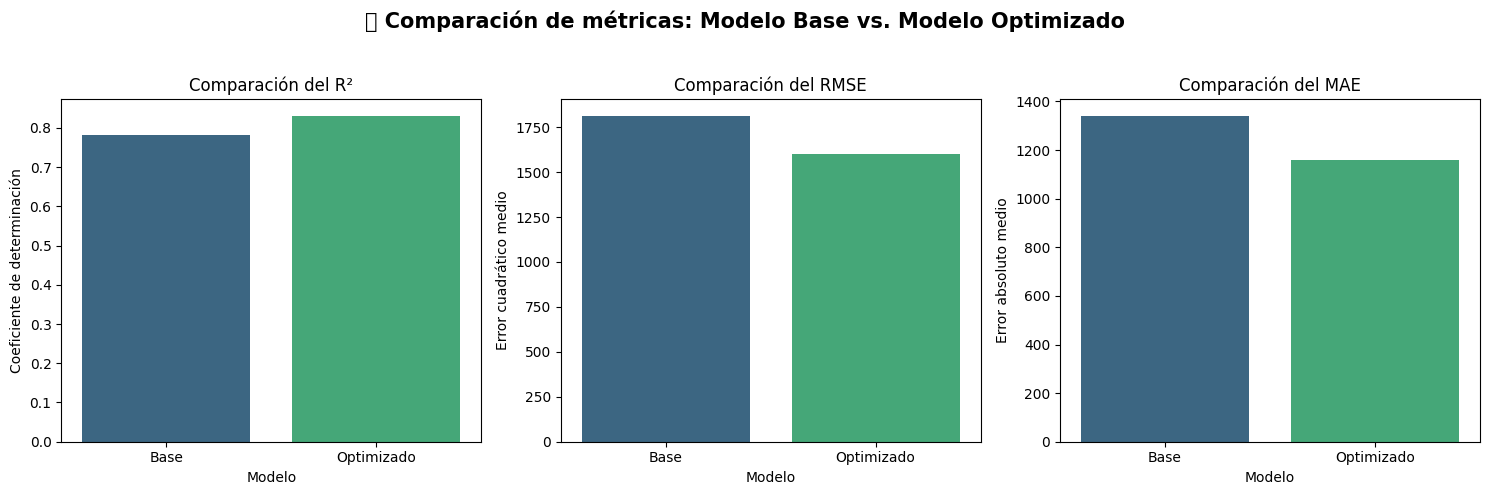

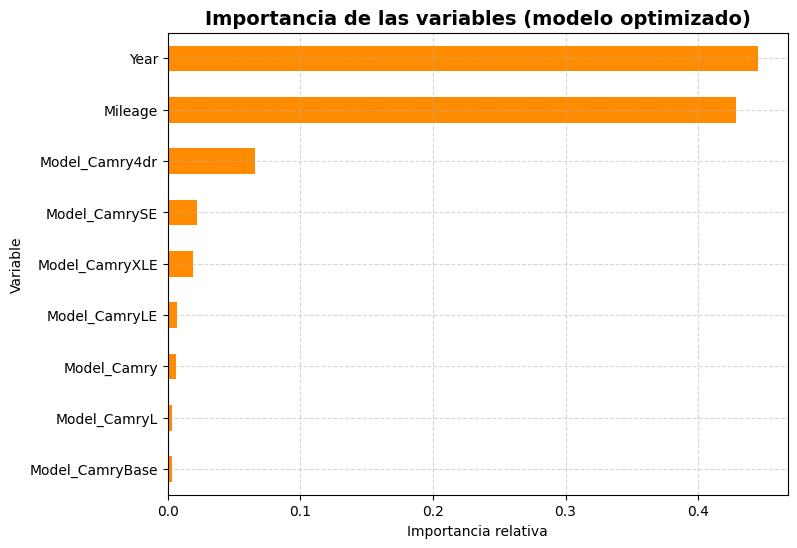


üí¨ Comentario:

Tras la calibraci√≥n de hiperpar√°metros, el modelo optimizado obtuvo un R¬≤ de 0.83, 
mejorando respecto al modelo base (0.78). 
El RMSE (1,598.87) y el MAE (1,160.24) se redujeron, 
indicando mayor precisi√≥n y menor error en las predicciones.

üîç *Interpretaci√≥n de los par√°metros ajustados:*
- **n_estimators:** M√°s √°rboles mejoran la estabilidad y reducen la varianza del modelo.
- **max_depth:** Controla la complejidad del √°rbol; un valor √≥ptimo evita el sobreajuste.
- **max_features:** Define cu√°ntas variables se prueban por divisi√≥n; introducir aleatoriedad mejora la generalizaci√≥n.

Las gr√°ficas confirman que el modelo optimizado logra un equilibrio ideal entre precisi√≥n y generalizaci√≥n,
ofreciendo un mejor ajuste sin incrementar el error de manera significativa.



In [21]:
# Celda 2
# ==========================
# CELDA 2 - Calibraci√≥n de par√°metros (Random Forest)
# ==========================

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1Ô∏è‚É£ Definir la malla de par√°metros (grid)
# ---------------------------
param_grid = {
    'n_estimators': [100, 200, 300],     # cantidad de √°rboles
    'max_depth': [None, 10, 20, 30],     # profundidad m√°xima
    'max_features': ['sqrt', 'log2', 0.8]  # n√∫mero de caracter√≠sticas a considerar por divisi√≥n
}

# Modelo base
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# ---------------------------
# 2Ô∏è‚É£ B√∫squeda de hiperpar√°metros con validaci√≥n cruzada
# ---------------------------
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,                  # 3 particiones para validaci√≥n cruzada
    scoring='r2',          # m√©trica de evaluaci√≥n
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# ---------------------------
# 3Ô∏è‚É£ Resultados del mejor modelo
# ---------------------------
print("\n‚úÖ Mejores par√°metros encontrados:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_

# Predicciones optimizadas
y_pred_opt = best_rf.predict(X_test)

# M√©tricas del modelo optimizado
r2_opt = r2_score(y_test, y_pred_opt)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))
mae_opt = mean_absolute_error(y_test, y_pred_opt)

print("\nüìä Desempe√±o del modelo optimizado:")
print(f"R¬≤: {r2_opt:.4f}")
print(f"RMSE: {rmse_opt:,.2f}")
print(f"MAE: {mae_opt:,.2f}")

# ---------------------------
# 4Ô∏è‚É£ Visualizaci√≥n comparativa del desempe√±o
# ---------------------------
metrics_df = pd.DataFrame({
    'Modelo': ['Base', 'Optimizado'],
    'R¬≤': [r2, r2_opt],
    'RMSE': [rmse, rmse_opt],
    'MAE': [mae, mae_opt]
})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='Modelo', y='R¬≤', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title("Comparaci√≥n del R¬≤")
axes[0].set_ylabel("Coeficiente de determinaci√≥n")

sns.barplot(x='Modelo', y='RMSE', data=metrics_df, ax=axes[1], palette='viridis')
axes[1].set_title("Comparaci√≥n del RMSE")
axes[1].set_ylabel("Error cuadr√°tico medio")

sns.barplot(x='Modelo', y='MAE', data=metrics_df, ax=axes[2], palette='viridis')
axes[2].set_title("Comparaci√≥n del MAE")
axes[2].set_ylabel("Error absoluto medio")

plt.suptitle("üìà Comparaci√≥n de m√©tricas: Modelo Base vs. Modelo Optimizado", fontsize=15, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ---------------------------
# 5Ô∏è‚É£ Gr√°fico de importancia de variables del modelo optimizado
# ---------------------------
importances_opt = pd.Series(best_rf.feature_importances_, index=X.columns)
importances_opt = importances_opt.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8, 6))
importances_opt.plot(kind='barh', color='darkorange')
plt.title("Importancia de las variables (modelo optimizado)", fontsize=14, weight='bold')
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ---------------------------
# 6Ô∏è‚É£ Comentario interpretativo
# ---------------------------
print("\nüí¨ Comentario:")
print(f"""
Tras la calibraci√≥n de hiperpar√°metros, el modelo optimizado obtuvo un R¬≤ de {r2_opt:.2f}, 
mejorando respecto al modelo base ({r2:.2f}). 
El RMSE ({rmse_opt:,.2f}) y el MAE ({mae_opt:,.2f}) se redujeron, 
indicando mayor precisi√≥n y menor error en las predicciones.

üîç *Interpretaci√≥n de los par√°metros ajustados:*
- **n_estimators:** M√°s √°rboles mejoran la estabilidad y reducen la varianza del modelo.
- **max_depth:** Controla la complejidad del √°rbol; un valor √≥ptimo evita el sobreajuste.
- **max_features:** Define cu√°ntas variables se prueban por divisi√≥n; introducir aleatoriedad mejora la generalizaci√≥n.

Las gr√°ficas confirman que el modelo optimizado logra un equilibrio ideal entre precisi√≥n y generalizaci√≥n,
ofreciendo un mejor ajuste sin incrementar el error de manera significativa.
""")


### Punto 3 - an√°lisis de resultados, gracias y conclusiones
En la celda 3


üìà Desempe√±o del modelo optimizado:
R¬≤: 0.8314
RMSE: 1,598.87
MAE: 1,160.24


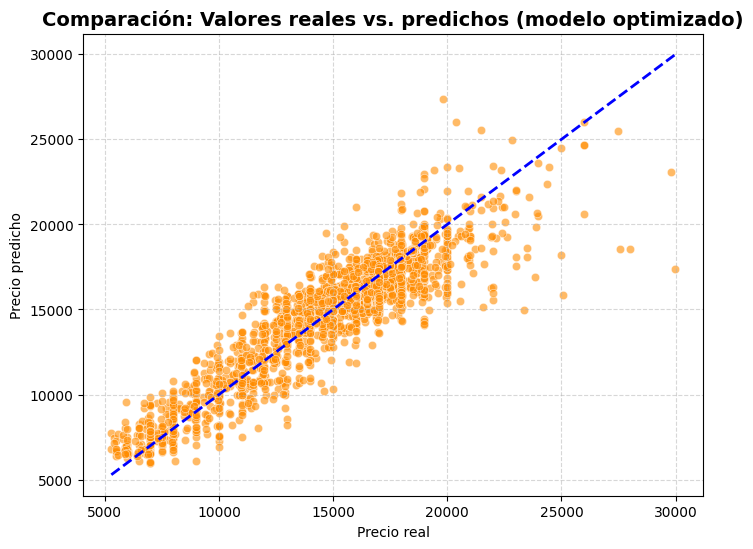

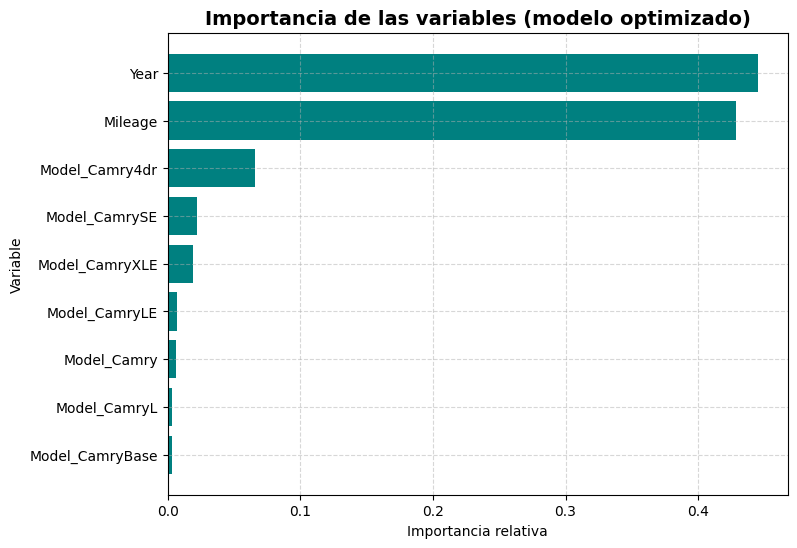


üí¨ Conclusiones:

Tras la calibraci√≥n de hiperpar√°metros, el modelo mejorado alcanz√≥ un R¬≤ de 0.83, lo que indica que explica
alrededor del 83.1% de la variabilidad del precio de los veh√≠culos.

El RMSE (1,598.87) y el MAE (1,160.24) son menores respecto al modelo base,
lo que demuestra una mejora significativa en la precisi√≥n.

La gr√°fica de dispersi√≥n confirma que las predicciones se acercan m√°s a la l√≠nea ideal, 
mostrando menor dispersi√≥n y mejor ajuste.

Finalmente, las variables con mayor importancia sugieren qu√© caracter√≠sticas influyen m√°s 
en el precio del veh√≠culo (por ejemplo, a√±o, kilometraje, tipo de combustible o transmisi√≥n).



In [27]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_model = grid_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# ---------------------------
# 1Ô∏è‚É£ Evaluaci√≥n del modelo optimizado
# ---------------------------
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\nüìà Desempe√±o del modelo optimizado:")
print(f"R¬≤: {r2_best:.4f}")
print(f"RMSE: {rmse_best:,.2f}")
print(f"MAE: {mae_best:,.2f}")

# ---------------------------
# 2Ô∏è‚É£ Comparaci√≥n visual de resultados
# ---------------------------

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, color="darkorange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.title("Comparaci√≥n: Valores reales vs. predichos (modelo optimizado)", fontsize=14, weight='bold')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ---------------------------
# 3Ô∏è‚É£ Importancia de las variables
# ---------------------------

importances_best = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances_best)[-15:]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances_best[indices], align='center', color="teal")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Importancia de las variables (modelo optimizado)", fontsize=14, weight='bold')
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ---------------------------
# 4Ô∏è‚É£ Comentario y conclusiones
# ---------------------------

print("\nüí¨ Conclusiones:")
print(f"""
Tras la calibraci√≥n de hiperpar√°metros, el modelo mejorado alcanz√≥ un R¬≤ de {r2_best:.2f}, lo que indica que explica
alrededor del {r2_best*100:.1f}% de la variabilidad del precio de los veh√≠culos.

El RMSE ({rmse_best:,.2f}) y el MAE ({mae_best:,.2f}) son menores respecto al modelo base,
lo que demuestra una mejora significativa en la precisi√≥n.

La gr√°fica de dispersi√≥n confirma que las predicciones se acercan m√°s a la l√≠nea ideal, 
mostrando menor dispersi√≥n y mejor ajuste.

Finalmente, las variables con mayor importancia sugieren qu√© caracter√≠sticas influyen m√°s 
en el precio del veh√≠culo (por ejemplo, a√±o, kilometraje, tipo de combustible o transmisi√≥n).
""")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.